# KNN PyTorch with MNIST
- **Task**: Classification
- **Data**: MNIST Dataset
- **Model**: KNN
- **Distance**: L1

In [1]:
!pip install -q watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.6 MB/s eta 0:00:00


In [2]:
%load_ext watermark
%watermark -a 'Nguyen Van Sy Thinh' -v -p torch

Author: Nguyen Van Sy Thinh

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

torch: 2.3.0+cu121



## 1. Import Library

In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import time
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## 2. Data

### 2.1. MNIST Dataset

In [4]:
# Loading training data
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    nn.Flatten()
])
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transform,
                               download=True)
# Loading test data
test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15768528.13it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 483660.58it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4347585.62it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2233356.24it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### 2.2. Data Information

In [5]:
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

Number of training samples: 60000
Number of testing samples: 10000


In [6]:
print(f"Datatype of the 1st training sample: {train_dataset[0][0].type()}")
print(f"Size of the 1st training sample: {train_dataset[0][0].size()}")

Datatype of the 1st training sample: torch.FloatTensor
Size of the 1st training sample: torch.Size([1, 784])


### 2.3. Data Visualization

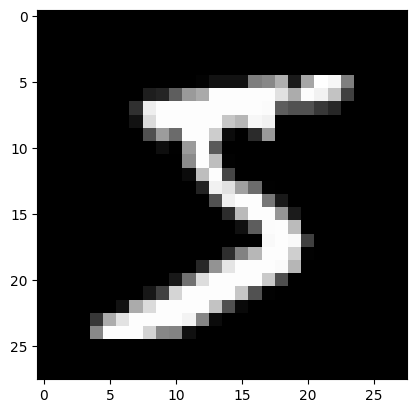

In [7]:
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()

In [8]:
print(f"Label of the 1st training sample: {train_dataset[0][1]}")

Label of the 1st training sample: 5


### 2.4. Load Dataset into TorchTensor

In [9]:
x_train = torch.stack([train_dataset[i][0].squeeze() for i in range(len(train_dataset))]).to(device)
y_train = torch.tensor([train_dataset[i][1] for i in range(len(train_dataset))], dtype=torch.int64).to(device)
x_test = torch.stack([test_dataset[i][0].squeeze() for i in range(len(test_dataset))]).to(device)
y_test = torch.tensor([test_dataset[i][1] for i in range(len(test_dataset))], dtype=torch.int64).to(device)

In [10]:
print(f"{x_train.shape = }")
print(f"{x_train.dtype = }")
print(f"{y_train.shape = }")
print(f"{y_train.dtype = }")

x_train.shape = torch.Size([60000, 784])
x_train.dtype = torch.float32
y_train.shape = torch.Size([60000])
y_train.dtype = torch.int64


## 3. Model

In [11]:
def knn(x_train, y_train, x_test, k, device, log_interval=100, log=True):

    # Get the amount of images, training images, and image size.
    num_images = x_test.shape[0]
    num_train = y_train.shape[0]
    img_size = x_test.shape[1]

    y_test = torch.zeros((num_images), device=device, dtype=torch.float)

    # For each of the images in the test set
    for test_index in range(0, num_images):

        # Get the image and calculate the distance to every item in the trainset
        test_image = x_test[test_index]
        distances = torch.norm(x_train - test_image, dim=1)

        # Get the top k indexes and get the most used index between them all
        indexes = torch.topk(distances, k, largest=False)[1]
        classes = torch.gather(y_train, 0, indexes)
        mode = int(torch.mode(classes)[0])

        # Save the test value in the index.
        y_test[test_index] = mode

        # Logging since with large sets it may be helpful
        if log:
            if test_index % log_interval == 0:
                print("Currently predicting at test_index = %d" % test_index)

    return y_test

In [12]:
print("Loaded train and test with sizes: %s, %s" % (str(x_train.shape), str(x_test.shape)))

Loaded train and test with sizes: torch.Size([60000, 784]), torch.Size([10000, 784])


In [13]:
pred = knn(x_train, y_train, x_test, k=1, device=device)

Currently predicting at test_index = 0
Currently predicting at test_index = 100
Currently predicting at test_index = 200
Currently predicting at test_index = 300
Currently predicting at test_index = 400
Currently predicting at test_index = 500
Currently predicting at test_index = 600
Currently predicting at test_index = 700
Currently predicting at test_index = 800
Currently predicting at test_index = 900
Currently predicting at test_index = 1000
Currently predicting at test_index = 1100
Currently predicting at test_index = 1200
Currently predicting at test_index = 1300
Currently predicting at test_index = 1400
Currently predicting at test_index = 1500
Currently predicting at test_index = 1600
Currently predicting at test_index = 1700
Currently predicting at test_index = 1800
Currently predicting at test_index = 1900
Currently predicting at test_index = 2000
Currently predicting at test_index = 2100
Currently predicting at test_index = 2200
Currently predicting at test_index = 2300
Curr

In [14]:
correct = pred.eq(y_test.to(device).view_as(pred)).sum()
print("Correct predictions: %d/%d, Accuracy: %f" % (correct, y_test.shape[0], 100. * correct / y_test.shape[0]))

Correct predictions: 9691/10000, Accuracy: 96.909996


## 4. Inference

### 4.1. Accuracy

In [15]:
correct = pred.eq(y_test.to(device).view_as(pred)).sum()
print("Correct predictions: %d/%d, Accuracy: %f" % (correct, y_test.shape[0], 100. * correct / y_test.shape[0]))

Correct predictions: 9691/10000, Accuracy: 96.909996


## 5. Hyperparameter Grid Search

In [16]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 25, 37, 49, 200]

correct_vals = []

best_k = -1
best_correct = 0

for k in k_values:
    pred = knn(x_train, y_train, x_test, k=k, device=device, log=False)
    correct = pred.eq(y_test.view_as(pred)).sum()
    print("K = %d, Correct: %d, Accuracy: %.2f" % (k, correct, 100. * correct / y_test.shape[0]))

K = 1, Correct: 9691, Accuracy: 96.91
K = 2, Correct: 9627, Accuracy: 96.27
K = 3, Correct: 9705, Accuracy: 97.05
K = 4, Correct: 9682, Accuracy: 96.82
K = 5, Correct: 9686, Accuracy: 96.86
K = 6, Correct: 9689, Accuracy: 96.89
K = 7, Correct: 9694, Accuracy: 96.94
K = 8, Correct: 9674, Accuracy: 96.74
K = 9, Correct: 9665, Accuracy: 96.65
K = 10, Correct: 9671, Accuracy: 96.71
K = 13, Correct: 9652, Accuracy: 96.52
K = 25, Correct: 9606, Accuracy: 96.06
K = 37, Correct: 9575, Accuracy: 95.75
K = 49, Correct: 9541, Accuracy: 95.41
K = 200, Correct: 9291, Accuracy: 92.91


## 7. Conclusion
- **Accuracy**: 97.05%